In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
from vrae.vrae import VRAE
from vrae.utils import *
import numpy as np
import torch

import plotly
from torch.utils.data import DataLoader, TensorDataset
plotly.offline.init_notebook_mode()

c:\Users\hachou\Anaconda3\envs\cse599n\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import matplotlib.pyplot as plt # plotting library
import numpy as np # this module is useful to work with numerical arrays
import pandas as pd 
import random 
# import tensorflow as tf
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader,random_split
from torch import nn
import torch.nn.functional as F
import torch.optim as optim

In [4]:
import numpy as np
import time 
from matplotlib import pyplot as plt
import random
import sys
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import sys
import numpy as np
from scipy.signal import butter,filtfilt
# from pupillab_file_methods import load_pldata_file

# produce matlab-style plots
import matplotlib as mpl
# increase font size on plots
mpl.rc('font',**{'size':18})
# use LaTeX to render symbols
mpl.rc('text',usetex=False)
# render animation
mpl.rc('animation',html='html5')
# animation
from matplotlib import animation as ani
# Matlab-style plotting
import matplotlib.pyplot as plt

# prep data

In [5]:
# 6 subjects, 2 trials each

# self._save_to_hdf_table(timestamp  = current_time, 
#                         data = emg_signals, 
#                         aux_data = aux_channels,
#                         sample_num = sample_num)

packet_freq = 32
time_size = 6000 #maximum timestamp

train_data = []
#subject 1
FILE_LOAD_FOLDER = "C:\\Users\\hachou\\OneDrive - UW\\meta\\eye_tracking\\pilot_022323\\pilot_Liya_022323_ref_dis\\"
Task_Data = h5py.File(FILE_LOAD_FOLDER+'quattro_data_METACPHS_S0_L2_a_75_D_8_BLOCK_0_pE_1e-06_pD_1e-04_pF_1e-07.h5', 'r')
train_data.append( Task_Data['quattro']['data'][:time_size,:,0] )
Task_Data = h5py.File(FILE_LOAD_FOLDER+'quattro_data_METACPHS_S0_L2_a_75_D_8_BLOCK_0_pE_1e-06_pD_1e-04_pF_1e-0716427.h5', 'r')
train_data.append( Task_Data['quattro']['data'][:time_size,:,0] ) # time x 64 channels

#subject 2
FILE_LOAD_FOLDER = "C:\\Users\\hachou\\OneDrive - UW\\meta\\eye_tracking\\pilot_022423\\pilot_Sasha_022324_ref_dis\\"
Task_Data = h5py.File(FILE_LOAD_FOLDER+'quattro_data_METACPHS_S1_L2_a_75_D_8_BLOCK_0_pE_1e-06_pD_1e-04_pF_1e-07.h5', 'r')
train_data.append( Task_Data['quattro']['data'][:time_size,:,0] )
Task_Data = h5py.File(FILE_LOAD_FOLDER+'quattro_data_METACPHS_S1_L2_a_75_D_8_BLOCK_0_pE_1e-06_pD_1e-04_pF_1e-07154455.h5', 'r')
train_data.append( Task_Data['quattro']['data'][:time_size,:,0] )

#subject 3
FILE_LOAD_FOLDER = "C:\\Users\\hachou\\OneDrive - UW\\meta\\eye_tracking\\pilot_022723\\pilot_Jason_022723_ref_dis\\"
Task_Data = h5py.File(FILE_LOAD_FOLDER+'quattro_data_METACPHS_S1_L2_a_75_D_8_BLOCK_0_pE_1e-06_pD_1e-04_pF_1e-07.h5', 'r')
train_data.append( Task_Data['quattro']['data'][:time_size,:,0] )
Task_Data = h5py.File(FILE_LOAD_FOLDER+'quattro_data_METACPHS_S1_L2_a_75_D_8_BLOCK_0_pE_1e-06_pD_1e-04_pF_1e-07174147.h5', 'r')
train_data.append( Task_Data['quattro']['data'][:time_size,:,0] )

#subject 4
FILE_LOAD_FOLDER = "C:\\Users\\hachou\\OneDrive - UW\\meta\\eye_tracking\\pilot_030723\\pilot_Jason_ref_dis\\"
Task_Data = h5py.File(FILE_LOAD_FOLDER+'quattro_data_METACPHS_S0_L2_a_75_D_8_BLOCK_0_pE_1e-06_pD_1e-04_pF_1e-07.h5', 'r')
train_data.append( Task_Data['quattro']['data'][:time_size,:,0] )
Task_Data = h5py.File(FILE_LOAD_FOLDER+'quattro_data_METACPHS_S0_L2_a_75_D_8_BLOCK_0_pE_1e-06_pD_1e-04_pF_1e-07173225.h5', 'r')
train_data.append( Task_Data['quattro']['data'][:time_size,:,0] )

#subject 5
FILE_LOAD_FOLDER = "C:\\Users\\hachou\\OneDrive - UW\\meta\\eye_tracking\\pilot_030923\\pilot_Maneeshika_030923_ref_dis\\"
Task_Data = h5py.File(FILE_LOAD_FOLDER+'quattro_data_METACPHS_S0_L2_a_75_D_8_BLOCK_0_pE_1e-06_pD_1e-04_pF_1e-07.h5', 'r')
train_data.append( Task_Data['quattro']['data'][:time_size,:,0] )
Task_Data = h5py.File(FILE_LOAD_FOLDER+'quattro_data_METACPHS_S0_L2_a_75_D_8_BLOCK_0_pE_1e-06_pD_1e-04_pF_1e-0713171.h5', 'r')
train_data.append( Task_Data['quattro']['data'][:time_size,:,0] )


In [6]:
train_data = np.squeeze(np.asarray(train_data))
print(train_data.shape)

channel = 64
T = 150
num = 10*6000//T
train_data_ = np.reshape(train_data,(num,T,channel))
print(train_data_.shape)  # 400 datasets x time (150) x 64 channels

# make tensor
TRAIN_DATA = torch.from_numpy(train_data_)
# TRAIN_DATA = TRAIN_DATA[:,None,:,:]
print(TRAIN_DATA.size()) 

(10, 6000, 64)
(400, 150, 64)
torch.Size([400, 150, 64])


In [7]:
# labels = which participants (which mapping)
train_label = np.repeat(np.array([[0,1,2,3,4]]), 400//5)
train_label = train_label[:,np.newaxis]
train_label.shape

(400, 1)

In [8]:
#subject 6 - test data set
test_data = []
FILE_LOAD_FOLDER = "C:\\Users\\hachou\\OneDrive - UW\\meta\\eye_tracking\\pilot_Liya_030923\\pilot_Liya_030923_ref_dis\\"
Task_Data = h5py.File(FILE_LOAD_FOLDER+'quattro_data_METACPHS_S0_L2_a_75_D_8_BLOCK_0_pE_1e-06_pD_1e-04_pF_1e-07.h5', 'r')
test_data.append( Task_Data['quattro']['data'][:time_size,:,0] )
Task_Data = h5py.File(FILE_LOAD_FOLDER+'quattro_data_METACPHS_S0_L2_a_75_D_8_BLOCK_0_pE_1e-06_pD_1e-04_pF_1e-07141221.h5', 'r')
test_data.append( Task_Data['quattro']['data'][:time_size,:,0] ) # time x 64 channels

#subject 7 - test data set
Task_Data = h5py.File('test_dataset\\quattro_data_METACPHS_S0_L2_a_75_D_8_BLOCK_0_pE_1e-06_pD_1e-04_pF_1e-07162543.h5', 'r')
test_data.append( Task_Data['quattro']['data'][:time_size,:,0] )
Task_Data = h5py.File('test_dataset\\quattro_data_METACPHS_S0_L2_a_75_D_8_BLOCK_0_pE_1e-06_pD_1e-04_pF_1e-07162118.h5', 'r')
test_data.append( Task_Data['quattro']['data'][:time_size,:,0] ) # time x 64 channels

In [9]:
test_data = np.squeeze(np.asarray(test_data))
print(test_data.shape)

channel = 64
T = 150
num = 4*6000//T
test_data_ = np.reshape(test_data,(num,T,channel))
print(test_data_.shape)  # 400 datasets x time (150) x 64 channels

# make tensor
TEST_DATA = torch.from_numpy(test_data_)
# TEST_DATA = TEST_DATA[:,None,:,:]
print(TEST_DATA.size()) 

(4, 6000, 64)
(160, 150, 64)
torch.Size([160, 150, 64])


In [10]:
# test labels = which participants (which mapping)
test_label = np.repeat(np.array([[0,1]]), 160//2)
test_label = test_label[:,np.newaxis]
test_label.shape

(160, 1)

In [11]:
# print(Task_Data['quattro']['data'][:time_size,:,0].shape)  # time x 64 channels

# # make tensor
# TRAIN_DATA = torch.from_numpy(np.squeeze(np.asarray(train_data)))
# TRAIN_DATA = TRAIN_DATA[:,None,:,:]
# print(TRAIN_DATA.size()) # 10 trials x time x 64 channels

# VALID_DATA = torch.from_numpy(np.squeeze(np.asarray(valid_data)))
# VALID_DATA = VALID_DATA[:,None,:,:]
# print(VALID_DATA.size()) # 2 trials x time x 64 channels

# TEST_DATA = torch.from_numpy(np.squeeze(np.asarray(test_data)))
# TEST_DATA = TEST_DATA[:,None,:,:]
# print(TEST_DATA.size()) # 2 trials x time x 64 channels

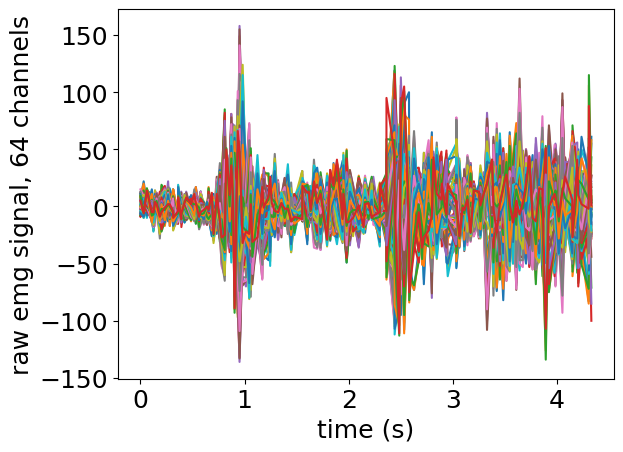

In [13]:
t = (Task_Data['quattro']['timestamp'][:T] - Task_Data['quattro']['timestamp'][:T][0]).flatten()
plt.plot(t,TRAIN_DATA[0,:,:])
plt.xlabel('time (s)')
plt.ylabel('raw emg signal, 64 channels')
plt.show()

## EMG rectification

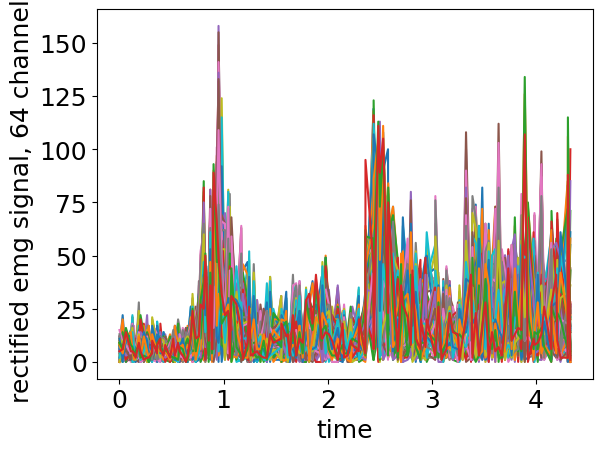

In [14]:
# full wave rectification
train_data_rec = torch.absolute(TRAIN_DATA)
# valid_data_rec = torch.absolute(VALID_DATA)
test_data_rec = torch.absolute(TEST_DATA)

plt.plot(t,train_data_rec[0,:,:])
plt.xlabel('time')
plt.ylabel('rectified emg signal, 64 channels')
plt.show()

# VAE

In [15]:
# make tensor dataset
train_dataset = TensorDataset(train_data_rec)
test_dataset = TensorDataset(test_data_rec)

In [16]:
# **Fetch `sequence_length` from dataset**
sequence_length = train_data_rec.shape[1]
sequence_length

150

In [17]:
#**Fetch `number_of_features` from dataset** 
number_of_features = train_data_rec.shape[2]
number_of_features

64

## hyperparameters

In [18]:
# hyperparameters
hidden_size = 90
hidden_layer_depth = 1
latent_length = 10 #20
batch_size = 10 # 32
learning_rate = 1e-4
n_epochs =  40
dropout_rate = 0.2
optimizer = 'SGD' #'Adam' # options: ADAM, SGD
cuda = True # options: True, False
print_every=30
clip = True # options: True, False
max_grad_norm=5
loss = 'MSELoss' # options: SmoothL1Loss, MSELoss
block = 'LSTM' # options: LSTM, GRU
dload = './model_dir' #download directory

In [19]:
#initialization
vrae = VRAE(sequence_length=sequence_length,
            number_of_features = number_of_features,
            hidden_size = hidden_size, 
            hidden_layer_depth = hidden_layer_depth,
            latent_length = latent_length,
            batch_size = batch_size,
            learning_rate = learning_rate,
            n_epochs = n_epochs,
            dropout_rate = dropout_rate,
            optimizer = optimizer, 
            cuda = cuda,
            print_every=print_every, 
            clip=clip, 
            max_grad_norm=max_grad_norm,
            loss = loss,
            block = block)
            # dload = dload)

c:\Users\hachou\Anaconda3\envs\cse599n\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning:

dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1

c:\Users\hachou\Anaconda3\envs\cse599n\lib\site-packages\torch\nn\_reduction.py:42: UserWarning:

size_average and reduce args will be deprecated, please use reduction='sum' instead.



## fit the model

In [20]:
vrae.fit(train_dataset)


Epoch: 0
Batch 30, loss = 557708416.0000, recon_loss = 557708416.0000, kl_loss = 0.2286
Average loss: 963445052.7179
Epoch: 1
Batch 30, loss = 1287125888.0000, recon_loss = 1287125888.0000, kl_loss = 0.2934
Average loss: 963405111.7949
Epoch: 2
Batch 30, loss = 842262208.0000, recon_loss = 842262208.0000, kl_loss = 0.2849
Average loss: 963365369.4359
Epoch: 3
Batch 30, loss = 850200192.0000, recon_loss = 850200192.0000, kl_loss = 0.2732
Average loss: 963325673.0256
Epoch: 4
Batch 30, loss = 1197664640.0000, recon_loss = 1197664640.0000, kl_loss = 0.2611
Average loss: 963286404.1026
Epoch: 5
Batch 30, loss = 1089426816.0000, recon_loss = 1089426816.0000, kl_loss = 0.3115
Average loss: 963247261.5385
Epoch: 6
Batch 30, loss = 1006298880.0000, recon_loss = 1006298880.0000, kl_loss = 0.3220
Average loss: 963207749.7436
Epoch: 7
Batch 30, loss = 692301824.0000, recon_loss = 692301824.0000, kl_loss = 0.2745
Average loss: 963168654.7692
Epoch: 8
Batch 30, loss = 947792000.0000, recon_loss = 9

## reconstruct the data

In [21]:
EMG_reconstruct = vrae.reconstruct(test_dataset)
EMG_reconstruct.shape #time x size x 1

(150, 160, 64)

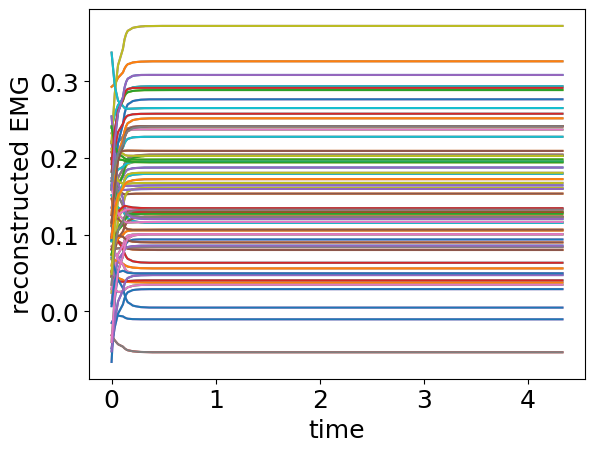

In [27]:
plt.plot(t,EMG_reconstruct[:,10,:])
plt.plot(t,EMG_reconstruct[:,10,:])
plt.xlabel('time')
plt.ylabel('reconstructed EMG')
plt.show()


## transform to latend variables

In [101]:
z_run = vrae.transform(train_dataset) 
# z_run = vrae.transform(test_dataset) 
z_run.shape # 160 dataset x 2 latend variables


(400, 10)

## Visualize PCA Dimensions of latend variables

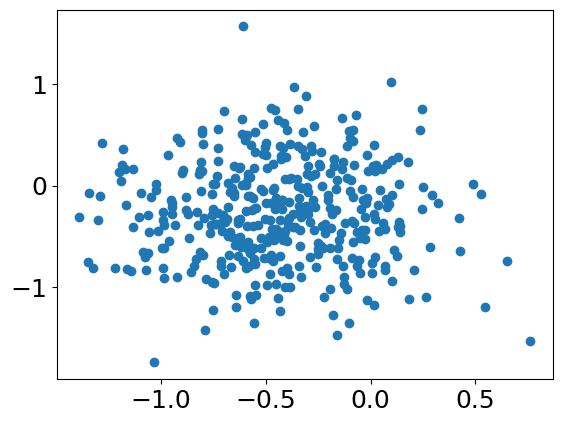

In [102]:
plt.scatter(z_run[:,0],z_run[:,1])
plt.show()

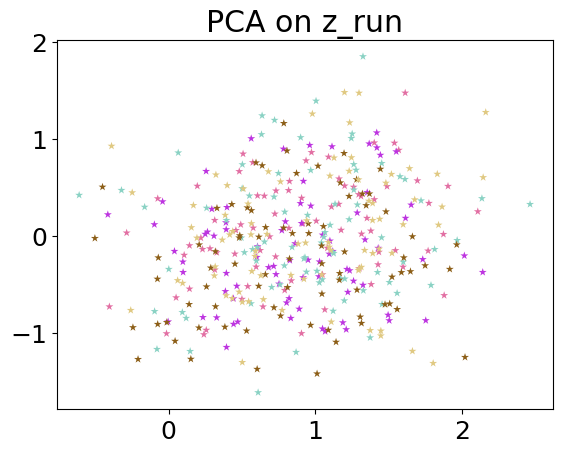

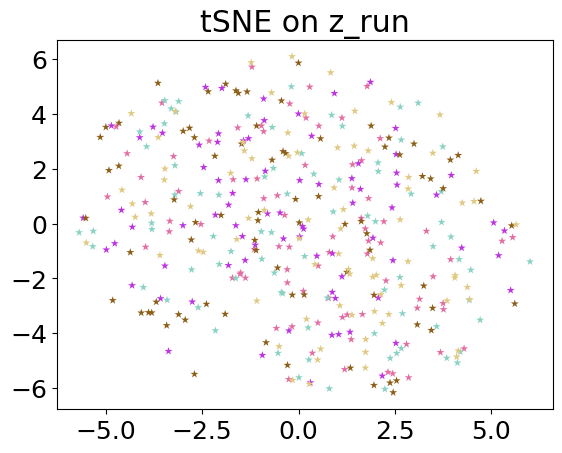

In [103]:
plot_clustering(z_run, train_label, engine='matplotlib', download = False)
# plot_clustering(z_run, test_label, engine='matplotlib', download = False)

# Stand EMG pre-processing 


## EMG data filtering

In [99]:
# low-pass filtering
def butter_lowpass_filter(data, cutoff, fs, order,nyq):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Filter requirements:
T = t[-1]
fs = 32       # sample rate, Hz
cutoff = 2     # desired cutoff frequency of the filter, Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 4      # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

filtered_train_data = np.empty(train_data_rec.size())
filtered_test_data = np.empty(test_data_rec.size())
for ch in range(64): # index of channels
    for idx in range(10): # index of trial
        filtered_train_data[idx,:,ch] = butter_lowpass_filter(np.squeeze(train_data_rec[idx,:,ch]), cutoff, fs, order,nyq)
    for idx in range(2): # index of trial
        filtered_test_data[idx,:,ch] = butter_lowpass_filter(np.squeeze(test_data_rec[idx,:,ch]), cutoff, fs, order,nyq)

# filtered_train_data_ = torch.absolute(torch.from_numpy(filtered_train_data))
# filtered_test_data_ = torch.absolute(torch.from_numpy(filtered_test_data))

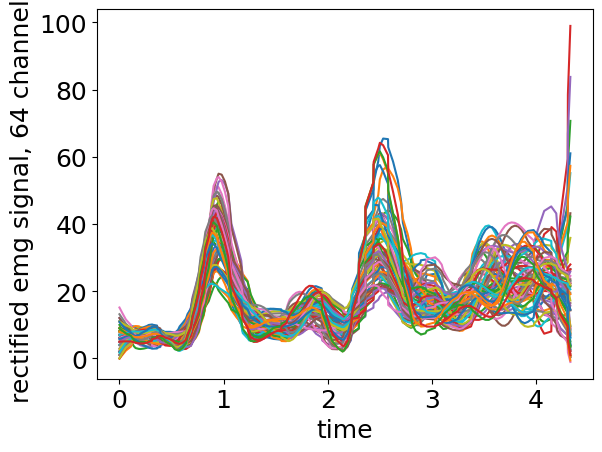

In [100]:
plt.plot(t,filtered_train_data[0,:,:])
plt.xlabel('time')
plt.ylabel('rectified emg signal, 64 channels')
plt.show()

# VAE

In [201]:
class MyDataset(Dataset):
    def __init__(self, inputs, outputs): #prepare the class and load data
        super().__init__()
        # self.inputs = torch.tensor(inputs)
        # self.outputs = torch.tensor(outputs)
        self.inputs = inputs
        self.outputs = outputs
    def __len__(self): # the size of dataset
        return len(self.inputs)
    def __getitem__(self, idx): # return the data we are interested in using
        return self.inputs[idx], self.outputs[idx]

In [202]:
train_dataset = MyDataset(train_data_rec, filtered_train_data_)
valid_dataset = MyDataset(valid_data_rec, filtered_valid_data_)
test_dataset = MyDataset(test_data_rec, filtered_test_data_)

train_loader = DataLoader(train_dataset, batch_size=5, num_workers=0) #num_workers = # of subprocesses
valid_loader = DataLoader(valid_dataset, batch_size=5, num_workers=0) #num_workers = # of subprocesses
test_loader = DataLoader(test_dataset, batch_size=5, num_workers=0) #num_workers = # of subprocesses

## encoder

In [203]:
class VariationalEncoder(nn.Module):
    def __init__(self, latent_dims):  
        super(VariationalEncoder, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, 3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(8, 16, 3, stride=2, padding=1)
        self.batch2 = nn.BatchNorm2d(16)
        self.conv3 = nn.Conv2d(16, 32, 3, stride=2, padding=0)  
        self.linear1 = nn.Linear(3*3*32, 128)
        self.linear2 = nn.Linear(128, latent_dims)
        self.linear3 = nn.Linear(128, latent_dims)

        self.N = torch.distributions.Normal(0, 1)
        self.N.loc = self.N.loc.cuda() # hack to get sampling on the GPU
        self.N.scale = self.N.scale.cuda()
        self.kl = 0

    def forward(self, x):
        # x = x.to(device)
        x = F.relu(self.conv1(x))
        x = F.relu(self.batch2(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = torch.flatten(x, start_dim=1)
        x = F.relu(self.linear1(x))
        mu =  self.linear2(x)
        sigma = torch.exp(self.linear3(x))
        z = mu + sigma*self.N.sample(mu.shape)
        self.kl = (sigma**2 + mu**2 - torch.log(sigma) - 1/2).sum()
        return z      

## decoder

In [204]:
class Decoder(nn.Module):
    
    def __init__(self, latent_dims):
        super().__init__()

        self.decoder_lin = nn.Sequential(
            nn.Linear(latent_dims, 128),
            nn.ReLU(True),
            nn.Linear(128, 3 * 3 * 32),
            nn.ReLU(True)
        )

        self.unflatten = nn.Unflatten(dim=1, unflattened_size=(32, 3, 3))

        self.decoder_conv = nn.Sequential(
            nn.ConvTranspose2d(32, 16, 3, stride=2, output_padding=0),
            nn.BatchNorm2d(16),
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 8, 3, stride=2, padding=1, output_padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU(True),
            nn.ConvTranspose2d(8, 1, 3, stride=2, padding=1, output_padding=1)
        )
        
    def forward(self, x):
        x = self.decoder_lin(x)
        x = self.unflatten(x)
        x = self.decoder_conv(x)
        x = torch.sigmoid(x)
        return x

## VAE

In [205]:
class VariationalAutoencoder(nn.Module):
    def __init__(self, latent_dims):
        super(VariationalAutoencoder, self).__init__()
        self.encoder = VariationalEncoder(latent_dims)
        self.decoder = Decoder(latent_dims)

    def forward(self, x):
        # x = x.to(device)
        z = self.encoder(x)
        return self.decoder(z)

In [206]:
### Set the random seed for reproducible results
torch.manual_seed(0)

d = 4

vae = VariationalAutoencoder(latent_dims=d)

lr = 1e-3 

optim = torch.optim.Adam(vae.parameters(), lr=lr, weight_decay=1e-5)

# device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
# print(f'Selected device: {device}')

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# inputs, labels = inputs.to(device), labels.to(device)

# vae.to(device)

## training

In [199]:
for x, un in train_loader: 
    # Move tensor to the proper device
    
    # x = x.to(device)
    print(x.shape)

torch.Size([5, 1, 6000, 64])
torch.Size([5, 1, 6000, 64])


In [207]:
vae(x)

RuntimeError: expected scalar type Double but found Float

In [192]:
vae.train()

VariationalAutoencoder(
  (encoder): VariationalEncoder(
    (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (batch2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
    (linear1): Linear(in_features=288, out_features=128, bias=True)
    (linear2): Linear(in_features=128, out_features=64, bias=True)
    (linear3): Linear(in_features=128, out_features=64, bias=True)
  )
  (decoder): Decoder(
    (decoder_lin): Sequential(
      (0): Linear(in_features=64, out_features=128, bias=True)
      (1): ReLU(inplace=True)
      (2): Linear(in_features=128, out_features=288, bias=True)
      (3): ReLU(inplace=True)
    )
    (unflatten): Unflatten(dim=1, unflattened_size=(32, 3, 3))
    (decoder_conv): Sequential(
      (0): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2))
      (1): Bat

In [181]:
### Training function
def train_epoch(vae, device, dataloader, optimizer):
    # Set train mode for both the encoder and the decoder
    vae.train()
    train_loss = 0.0
    # Iterate the dataloader (we do not need the label values, this is unsupervised learning)
    for x, _ in dataloader: 
        # Move tensor to the proper device
        x = x.to(device)
        x_hat = vae(x)
        # Evaluate loss
        loss = ((x - x_hat)**2).sum() + vae.encoder.kl

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # Print batch loss
        print('\t partial train loss (single batch): %f' % (loss.item()))
        train_loss+=loss.item()

    return train_loss / len(dataloader.dataset)

## testing

In [182]:

### Testing function
def test_epoch(vae, device, dataloader):
    # Set evaluation mode for encoder and decoder
    vae.eval()
    val_loss = 0.0
    with torch.no_grad(): # No need to track the gradients
        for x, _ in dataloader:
            # Move tensor to the proper device
            x = x.to(device)
            # Encode data
            encoded_data = vae.encoder(x)
            # Decode data
            x_hat = vae(x)
            loss = ((x - x_hat)**2).sum() + vae.encoder.kl
            val_loss += loss.item()

    return val_loss / len(dataloader.dataset)

In [183]:
def plot_ae_outputs(encoder,decoder,n=10):
    plt.figure(figsize=(16,4.5))
    targets = test_dataset.targets.numpy()
    t_idx = {i:np.where(targets==i)[0][0] for i in range(n)}
    for i in range(n):
      ax = plt.subplot(2,n,i+1)
      img = test_dataset[t_idx[i]][0].unsqueeze(0).to(device)
      encoder.eval()
      decoder.eval()
      with torch.no_grad():
         rec_img  = decoder(encoder(img))
      plt.imshow(img.cpu().squeeze().numpy(), cmap='gist_gray')
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)  
      if i == n//2:
        ax.set_title('Original images')
      ax = plt.subplot(2, n, i + 1 + n)
      plt.imshow(rec_img.cpu().squeeze().numpy(), cmap='gist_gray')  
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)  
      if i == n//2:
         ax.set_title('Reconstructed images')
    plt.show()  

## validation

In [184]:
num_epochs = 5

for epoch in range(num_epochs):
   train_loss = train_epoch(vae,device,train_loader,optim)
   val_loss = test_epoch(vae,device,valid_loader)
   print('\n EPOCH {}/{} \t train loss {:.3f} \t val loss {:.3f}'.format(epoch + 1, num_epochs,train_loss,val_loss))
   plot_ae_outputs(vae.encoder,vae.decoder,n=10)

RuntimeError: Input type (torch.cuda.DoubleTensor) and weight type (torch.cuda.FloatTensor) should be the same

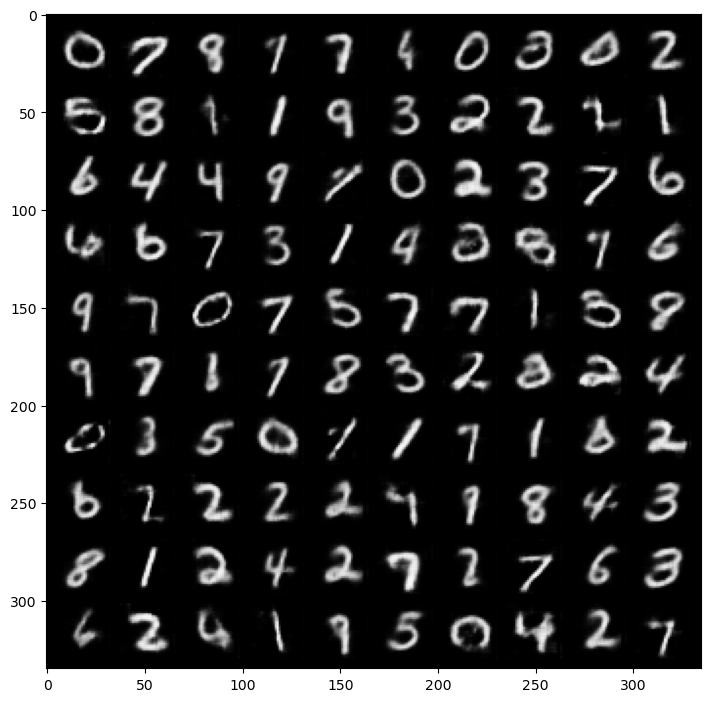

In [14]:
# generate new images by drawing latent vectors from the prior distribution


def show_image(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


vae.eval()

with torch.no_grad():

    # sample latent vectors from the normal distribution
    latent = torch.randn(128, d, device=device)

    # reconstruct images from the latent vectors
    img_recon = vae.decoder(latent)
    img_recon = img_recon.cpu()

    fig, ax = plt.subplots(figsize=(20, 8.5))
    show_image(torchvision.utils.make_grid(img_recon.data[:100],10,5))
    plt.show()

## visualize latent code

In [23]:
from tqdm import tqdm
from sklearn.manifold import TSNE
import plotly.express as px

In [24]:
encoded_samples = []
for sample in tqdm(test_dataset):
    img = sample[0].unsqueeze(0).to(device)
    label = sample[1]
    # Encode image
    vae.eval()
    with torch.no_grad():
        encoded_img  = vae.encoder(img)
    # Append to list
    encoded_img = encoded_img.flatten().cpu().numpy()
    encoded_sample = {f"Enc. Variable {i}": enc for i, enc in enumerate(encoded_img)}
    encoded_sample['label'] = label
    encoded_samples.append(encoded_sample)
    
encoded_samples = pd.DataFrame(encoded_samples)
encoded_samples


px.scatter(encoded_samples, x='Enc. Variable 0', y='Enc. Variable 1', color=encoded_samples.label.astype(str), opacity=0.7)


100%|██████████| 10000/10000 [00:11<00:00, 908.97it/s]


In [25]:
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(encoded_samples.drop(['label'],axis=1))

fig = px.scatter(tsne_results, x=0, y=1, color=encoded_samples.label.astype(str),labels={'0': 'tsne-2d-one', '1': 'tsne-2d-two'})
fig.show()